# Prophet

https://github.com/facebook/prophet

In [1]:
# Python
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('http://mirror.coggle.club/prophet/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.200924,7.488568,8.934262
3266,2017-01-16,8.525932,7.809271,9.245340
3267,2017-01-17,8.313330,7.627418,9.012617
3268,2017-01-18,8.145923,7.466100,8.895998
3269,2017-01-19,8.157831,7.465402,8.833143


Populating the interactive namespace from numpy and matplotlib


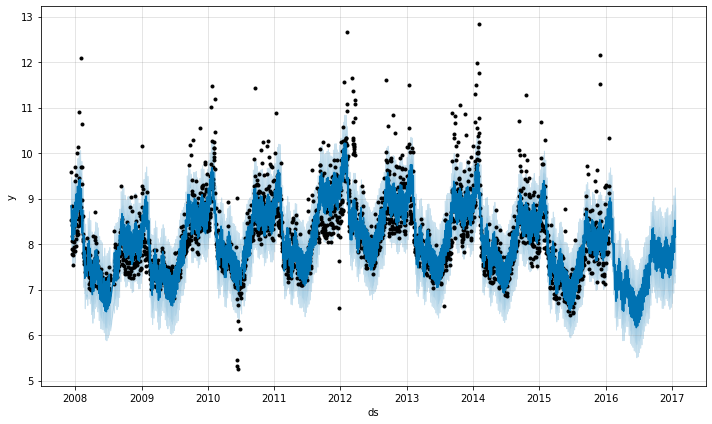

In [6]:
%pylab inline
fig1 = m.plot(forecast)

In [13]:
!wget http://mirror.coggle.club/lp1.data.txt

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/lyz/.wget-hsts'. HSTS will be disabled.
--2021-01-26 17:28:20--  http://mirror.coggle.club/lp1.data.txt
正在解析主机 mirror.coggle.club (mirror.coggle.club)... 139.215.131.222
正在连接 mirror.coggle.club (mirror.coggle.club)|139.215.131.222|:80... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 27345 (27K) [text/plain]
正在保存至: “lp1.data.txt”

lp1.data.txt        100%[===================>]  26.70K  --.-KB/s    用时 0.04s   

2021-01-26 17:28:21 (661 KB/s) - 已保存 “lp1.data.txt” [27345/27345])



# tsfresh
https://tsfresh.readthedocs.io/en/latest/index.html


In [15]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
timeseries, y = load_robot_execution_failures(file_name="./lp1.data.txt")

In [63]:
timeseries[timeseries['id'] == 1]

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
5,1,5,-1,-1,63,-3,-1,0
6,1,6,-1,-1,63,-3,0,0
7,1,7,-1,-1,63,-3,-1,0
8,1,8,-1,-1,63,-3,-1,0
9,1,9,-1,-1,61,-3,0,0


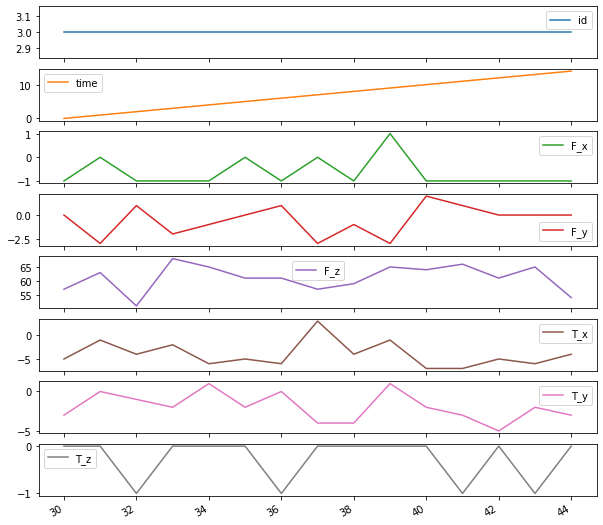

In [17]:
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [19]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 30/30 [00:03<00:00,  8.81it/s]


In [20]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

/home/lyz/.local/lib/python3.6/site-packages/tsfresh/utilities/dataframe_functions.py:172: RuntimeWarning:

The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"min"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'] did not have any finite values. Filling with zeros.



In [22]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 30/30 [00:02<00:00, 11.29it/s]


In [23]:
features_filtered_direct

,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__variance,T_y__standard_deviation,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",T_y__abs_energy,F_z__standard_deviation,...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7
1,14.0,14.0,15.0,13.0,0.222222,0.471405,1.000000,1.165352,10.0,1.203698,...,0.000000,0.0,-3.0,1.0,-0.310265,-0.751682,-1.0,-5.960000e+02,-1.0,-1.0
2,7.0,25.0,13.0,76.0,4.222222,2.054805,0.624118,6.020261,90.0,4.333846,...,0.000000,1.0,-9.2,1.0,-0.202951,0.057818,-3.6,-6.803846e+02,-1.0,-1.0
3,11.0,12.0,14.0,40.0,3.128889,1.768867,2.203858,8.235442,103.0,4.616877,...,0.000000,3.0,-6.6,0.0,0.539121,0.912474,-4.0,-6.170000e+02,-1.0,0.0
4,5.0,16.0,10.0,60.0,7.128889,2.669998,0.844394,12.067855,124.0,3.833188,...,0.000000,0.0,-9.0,0.0,-2.641390,-0.609735,-4.6,3.426308e+03,-1.0,1.0
5,9.0,17.0,13.0,46.0,4.160000,2.039608,2.730599,6.445330,180.0,4.841487,...,0.000000,0.0,-9.6,0.0,0.591927,0.072771,-5.0,-2.609000e+03,-1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,0.0,42780.0,1563.528889,39.541483,359.248162,309.190088,171261.0,291.988082,...,64.000000,46.0,203.2,0.0,38.559593,71.641254,36.4,-7.700628e+07,-105.0,66.8
85,0.0,1683.0,0.0,1523.0,14.755556,3.841296,36.770027,26.631007,503.0,14.501494,...,4.666667,4.5,-41.6,0.0,14.429645,16.349699,1.0,-1.050785e+04,5.8,10.6
86,0.0,83497.0,0.0,21064.0,2788.595556,52.807154,312.044052,429.697740,118013.0,121.420189,...,0.250000,7.0,-84.8,0.0,60.760842,71.095480,19.6,-5.544922e+06,30.4,38.4
87,0.0,1405437.0,0.0,308658.0,6415.715556,80.098162,481.046930,683.196535,2430295.0,204.966621,...,0.000000,90.5,-139.2,0.0,109.029954,173.699573,272.6,-9.881845e+07,246.8,154.8


# pyts

In [38]:
from pyts.classification import *
from pyts.datasets import load_gunpoint
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)
print(X_train.shape, y_train.shape)

clf = BOSSVS(window_size=28)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

clf = SAXVSM()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

(50, 150) (50,)
0.98
0.9533333333333334


/home/lyz/.local/lib/python3.6/site-packages/pyts/bag_of_words/bow.py:246: FutureWarning:

BagOfWords has been reworked in 0.11 in order to match its definition in the literature. To get the old BagOfWords, use pyts.bag_of_words.WordExtractor instead.



/home/lyz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass classes=[1 2], y=[2 2 1 1 2 2 2 2 2 1 1 1 1 1 2 1 2 2 1 2 1 1 1 2 1 2 1 1 2 1 1 2 2 1 2 1 2
 2 2 2 2 1 1 1 2 2 1 2 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error

/home/lyz/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



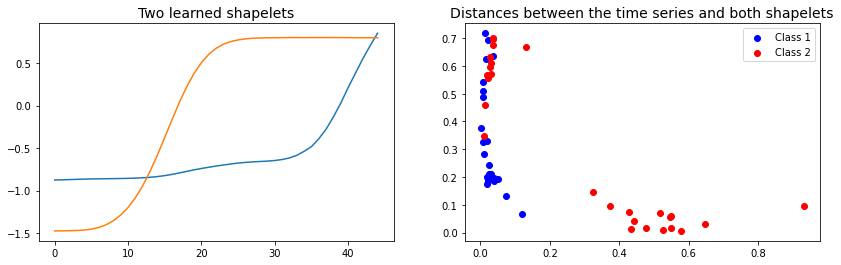

In [39]:
from pyts.utils import windowed_view

# Load the data set and fit the classifier
X, _, y, _ = load_gunpoint(return_X_y=True)
clf = LearningShapelets(random_state=42, tol=0.01)
clf.fit(X, y)

# Select two shapelets
shapelets = np.asarray([clf.shapelets_[0, -9], clf.shapelets_[0, -12]])

# Derive the distances between the time series and the shapelets
shapelet_size = shapelets.shape[1]
X_window = windowed_view(X, window_size=shapelet_size, window_step=1)
X_dist = np.mean(
    (X_window[:, :, None] - shapelets[None, :]) ** 2, axis=3).min(axis=1)

plt.figure(figsize=(14, 4))

# Plot the two shapelets
plt.subplot(1, 2, 1)
plt.plot(shapelets[0])
plt.plot(shapelets[1])
plt.title('Two learned shapelets', fontsize=14)

# Plot the distances
plt.subplot(1, 2, 2)
for color, label in zip('br', (1, 2)):
    plt.scatter(X_dist[y == label, 0], X_dist[y == label, 1],
                c=color, label='Class {}'.format(label))
plt.title('Distances between the time series and both shapelets',
          fontsize=14)
plt.legend()
plt.show()

In [41]:
from pyts.bag_of_words import BagOfWords
X, _, _, _ = load_gunpoint(return_X_y=True)
window_size, word_size = 30, 5
bow = BagOfWords(window_size=window_size, word_size=word_size,
                 window_step=window_size, numerosity_reduction=False)
X_bow = bow.transform(X)


/home/lyz/.local/lib/python3.6/site-packages/pyts/bag_of_words/bow.py:246: FutureWarning:

BagOfWords has been reworked in 0.11 in order to match its definition in the literature. To get the old BagOfWords, use pyts.bag_of_words.WordExtractor instead.



In [42]:
X_bow

array(['ddaaa bbbbd acccc ddbaa acdcc', 'abbdd bbbbd acccb dcbaa abccd',
       'bdbac abbcd cddba dcbaa dbabb', 'abbbd aabcd cccca dcbaa dabcc',
       'abcdd aabcd cccca cabcc ddbaa', 'dcbaa aabcd cccca dcabb ddbaa',
       'bbbbd acccc ccdca cccba dabbb', 'bbbbd acccc cdcaa ccaad cccca',
       'bbbcd dccaa cccca dcbaa bcabd', 'aabdd aacdd dcabb ddcaa ddcaa',
       'aacdd aacdd cccca dcbaa dabcc', 'aabdd aacdd dccaa ddcaa ddbaa',
       'babbd aabdd ddbaa cccca dbbbb', 'abbcd aacdd dcabb ddcaa ddcaa',
       'abcdc bbbbd acccc dcaab acdca', 'aabdd aacdd ddcba ddcaa ddcaa',
       'abcdd aabcd acccc ddbaa cbabd', 'ddbba bbbbd acccc dcbaa acdcb',
       'aaadd aacdd aabcd ddcaa ddaaa', 'bbbbd acdcb dbabd ddbaa bdcba',
       'acccc abbbd acccc ddcaa ddaab', 'cdbac aacdd ddcba ddbaa ddaab',
       'abbcd aacdd dcbca ddcaa ddcba', 'bbbbd acccc ddbaa dccba ddcba',
       'abbbd aabcd cccca dbbbb aacdd', 'bbbcd dccaa ddcba dbbbb dcbaa',
       'aaadd aacdd dcbaa ddcaa ddcaa', 'aabdd aacd

# sktime

https://github.com/alan-turing-institute/sktime

https://github.com/alan-turing-institute/sktime/blob/master/examples/02_classification_univariate.ipynb

https://github.com/sktime/sktime-dl/blob/master/examples/univariate_time_series_classification.ipynb

In [49]:
from sktime.classification.all import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_arrow_head(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
classifier = TimeSeriesForest()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)